In [3]:
import numpy as np
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

### Change the folder name list for a certain rats

In [4]:
folder_name_list = ["Rat9_SD1_HC_29_04_2020", "Rat9_SD2_CON_30_04_2020", 
                    "Rat9_SD3_OR_04_05_2020", "Rat9_SD6_OD_15_06_2020"]

In [5]:

complete_list = ['Pre-sleep', 'Trial1','Post_Trial1', 'Trial2', 'Post_Trial2', 'Trial3', 
                'Post_Trial3', 'Trial4', 'Post_Trial4', 'Trial5', 'PT5_part1', 'PT5_part2', 'PT5_part3', 'PT5_part4']
column = np.insert(complete_list,0,  "statistic")
column = np.insert(column,0,  "day_name")


In [6]:
statistic_all_date_df = pd.DataFrame(columns=column)
for folder_name in folder_name_list:
    path = "D:\Internship_Radbound\Cell_Assembly\\" + folder_name
    os.chdir(path)
    mean_filter_df = pd.read_csv('mean_filter_df.csv', index_col=0) 
#     print(mean_filter_df)
    mean_of_each_time_period = list(mean_filter_df.mean())
    sem_of_each_time_period = list(mean_filter_df.sem())
    mean_of_each_time_period.insert( 0, "mean")
    mean_of_each_time_period.insert( 0, folder_name)

#     print(len(mean_of_each_time_period))
    a_series = pd.Series(mean_of_each_time_period, index = statistic_all_date_df.columns)
    statistic_all_date_df = statistic_all_date_df.append(a_series, ignore_index=True)
    sem_of_each_time_period.insert(0, "sem")
    sem_of_each_time_period.insert(0, folder_name)

    a_series = pd.Series(sem_of_each_time_period, index = statistic_all_date_df.columns)
    statistic_all_date_df = statistic_all_date_df.append(a_series, ignore_index=True)

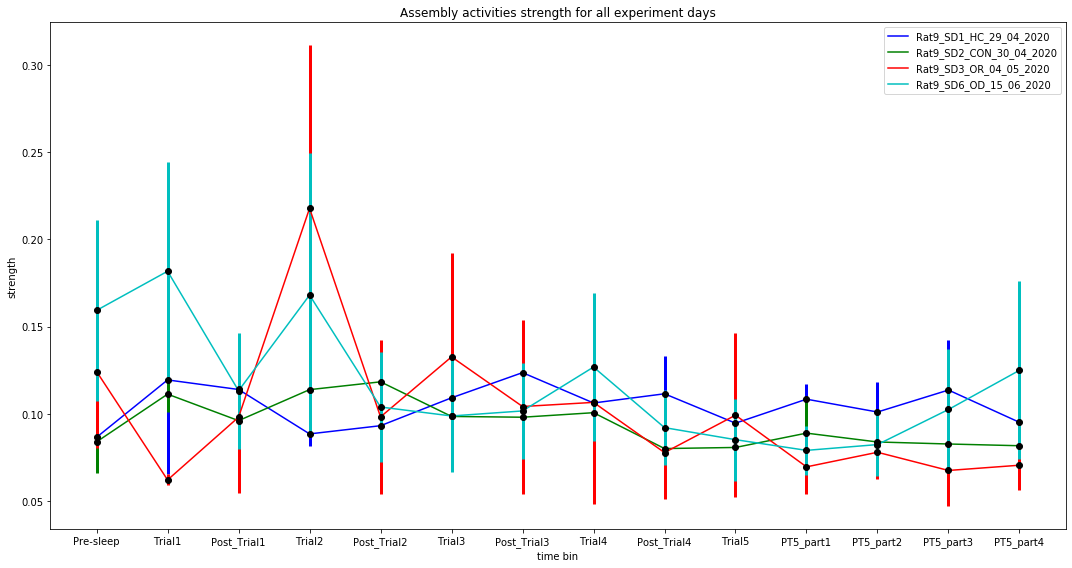

In [7]:
plt.figure(figsize=(15,8))
labels = complete_list
x = [x for x in range(len(labels))]
ticks = [x for x in range(len(labels))]
cycol = cycle('bgrcmk')

mean_df = statistic_all_date_df[statistic_all_date_df['statistic'] == 'mean']
sem_df = statistic_all_date_df[statistic_all_date_df['statistic'] == 'sem']
mean_df[mean_df["day_name"] == folder_name_list[0]][complete_list].values
for each_day in folder_name_list:
    mean_list = mean_df[mean_df["day_name"] == each_day][complete_list].values[0]
    sem_list = sem_df[sem_df["day_name"] == each_day][complete_list].values[0]
    current_color = next(cycol)
    label_str = each_day
    plt.plot(mean_list, color = current_color, label = label_str)
    plt.errorbar(x, mean_list, sem_list,  fmt='ok', color='black',
             ecolor=current_color, elinewidth=3, capsize=0)
    
plt.title('Assembly activities strength for all experiment days')
plt.xlabel('time bin')
plt.ylabel('strength')
plt.xticks(ticks, labels)
plt.tight_layout()
plt.legend()